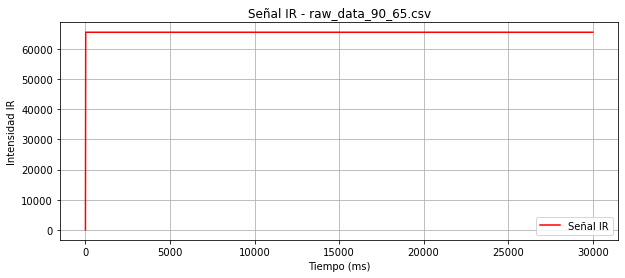

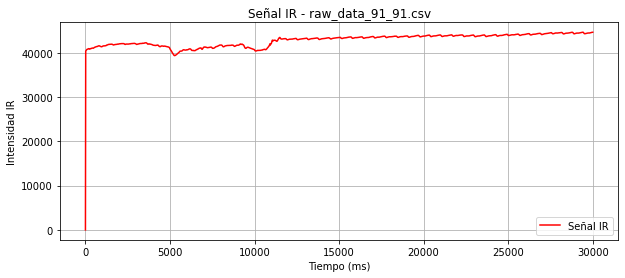

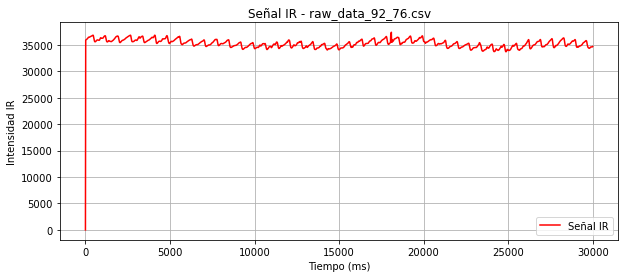

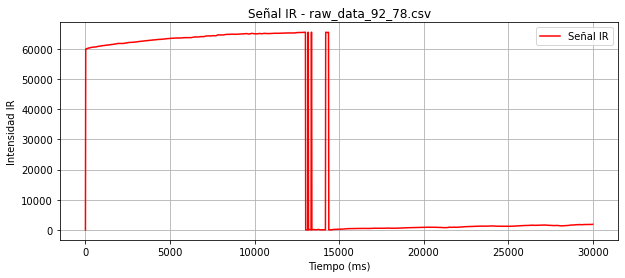

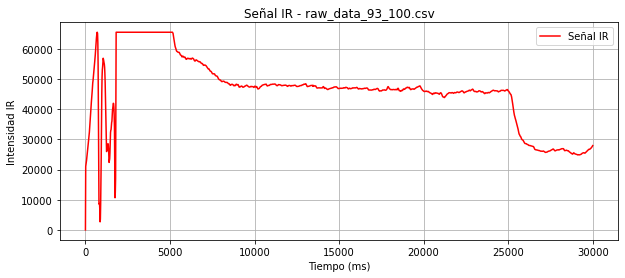

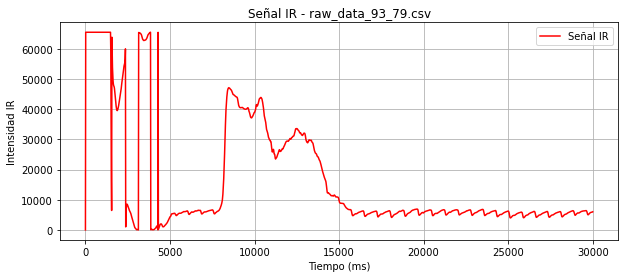

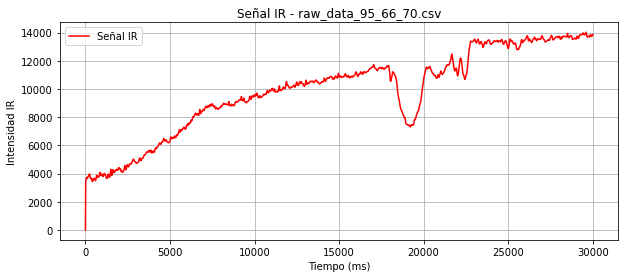

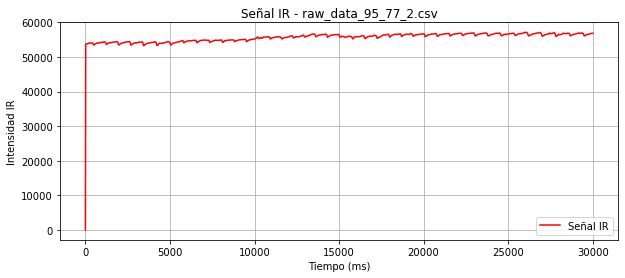

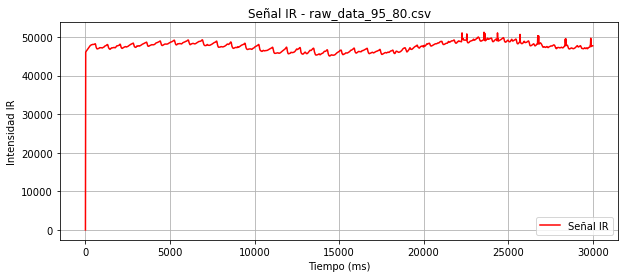

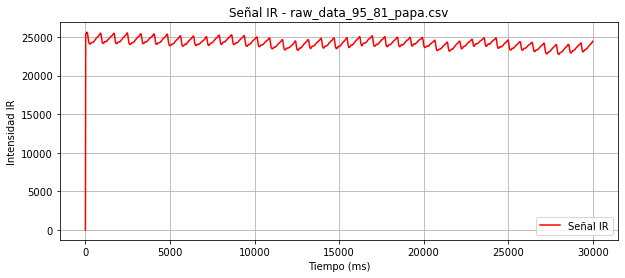

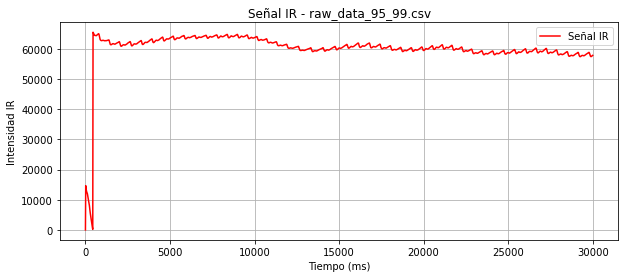

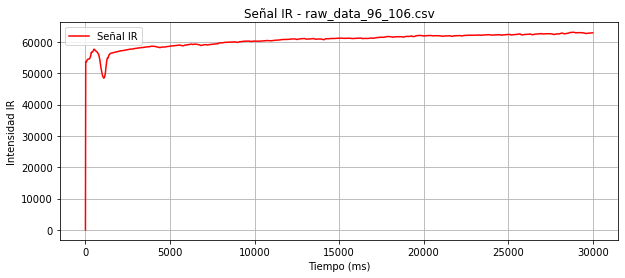

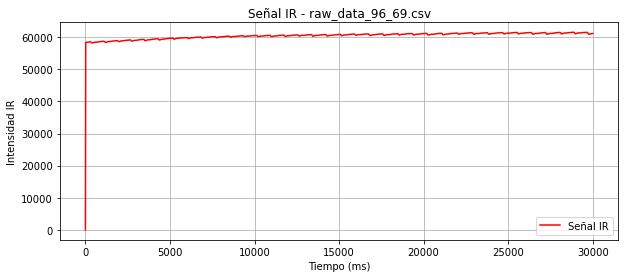

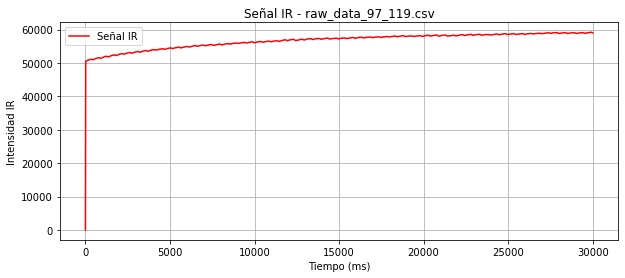

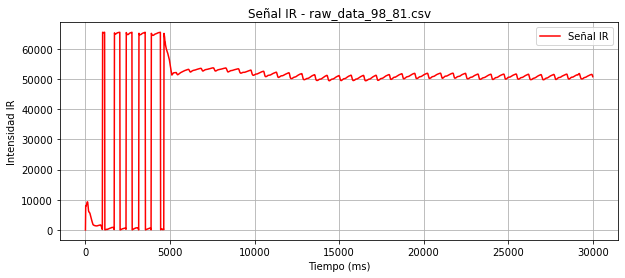

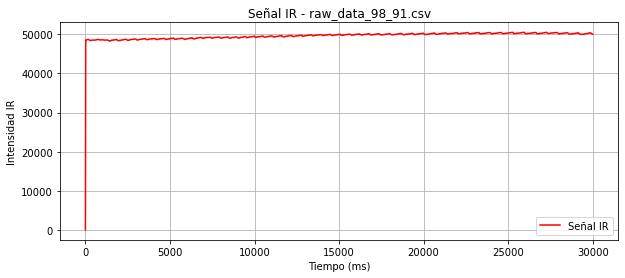

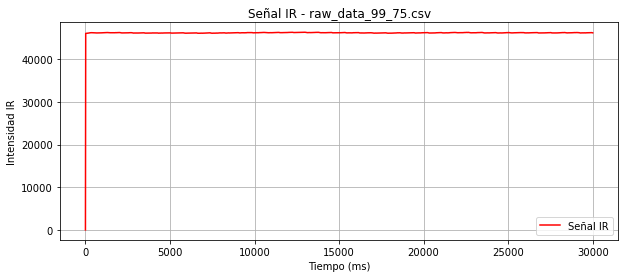

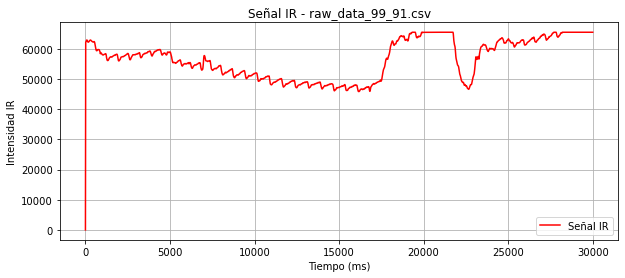

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Ruta donde están los CSV
ruta_csv = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"

# Buscar todos los archivos CSV en la carpeta
archivos = glob.glob(os.path.join(ruta_csv, "*.csv"))

# Iterar sobre cada archivo y graficar la señal IR
for archivo in archivos:
    # Cargar datos
    df = pd.read_csv(archivo, delimiter=";")

    # Verificar que la columna "IR" existe
    if "IR" not in df.columns:
        print(f"Advertencia: No se encontró la columna 'IR' en {archivo}")
        continue

    # Graficar la señal IR
    plt.figure(figsize=(10, 4))
    plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="red")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Intensidad IR")
    plt.title(f"Señal IR - {os.path.basename(archivo)}")
    plt.legend()
    plt.grid()
    plt.show()


In [8]:
import os
import glob
import pandas as pd

# Rutas de los CSV originales y de los recortados
ruta_csv = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Datos crudos\save_log2"
ruta_guardado = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Crear la carpeta de salida si no existe
os.makedirs(ruta_guardado, exist_ok=True)

# Buscar todos los archivos CSV en la carpeta
archivos = glob.glob(os.path.join(ruta_csv, "*.csv"))

for archivo in archivos:
    # Cargar el CSV con el separador correcto
    df = pd.read_csv(archivo, delimiter=";")
    
    # Verificar que las columnas necesarias existen
    columnas_requeridas = ["Tiempo (ms)", "IR", "AMB_IR", "RED", "AMB_RED"]
    if not all(col in df.columns for col in columnas_requeridas):
        print(f"Advertencia: El archivo {archivo} no tiene las columnas esperadas. Se omite.")
        continue
    
    # Convertir tiempo a segundos
    df["Tiempo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000  # Normalizar a segundos
    
    # Filtrar datos: quitar primeros y últimos 5 segundos
    tiempo_inicio = df["Tiempo (s)"].iloc[0] + 5
    tiempo_fin = df["Tiempo (s)"].iloc[-1] - 5
    df_recortado = df[(df["Tiempo (s)"] >= tiempo_inicio) & (df["Tiempo (s)"] <= tiempo_fin)]
    
    # Eliminar la columna auxiliar de tiempo en segundos
    df_recortado = df_recortado.drop(columns=["Tiempo (s)"])

    # Guardar el archivo recortado en la carpeta nueva
    nombre_archivo = os.path.basename(archivo)
    ruta_guardado_csv = os.path.join(ruta_guardado, nombre_archivo)
    df_recortado.to_csv(ruta_guardado_csv, sep=";", index=False)

    print(f"Procesado: {nombre_archivo} -> Guardado en {ruta_guardado_csv}")

print("\n Recorte completado para todos los archivos.")


Procesado: raw_data_90_65.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_90_65.csv
Procesado: raw_data_91_91.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_91_91.csv
Procesado: raw_data_92_76.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_92_76.csv
Procesado: raw_data_93_100.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_93_100.csv
Procesado: raw_data_95_77_2.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_77_2.csv
Procesado: raw_data_95_80.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_80.csv
Procesado: raw_data_95_81_papa.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_81_papa.csv
Procesado: raw_data_95_99.csv -> Guardado en C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Proces

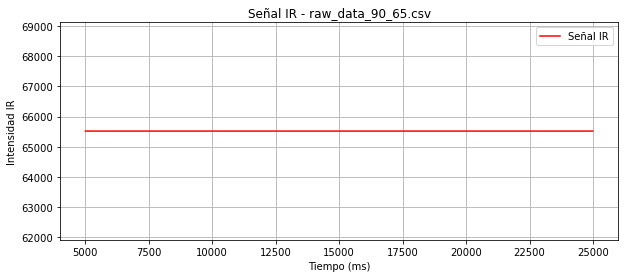

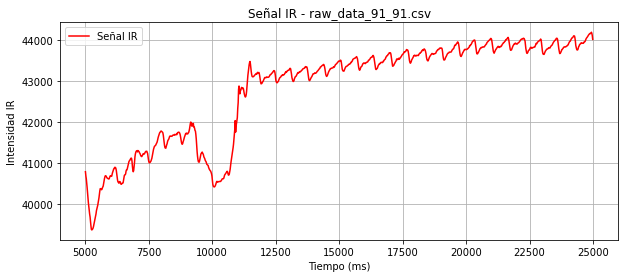

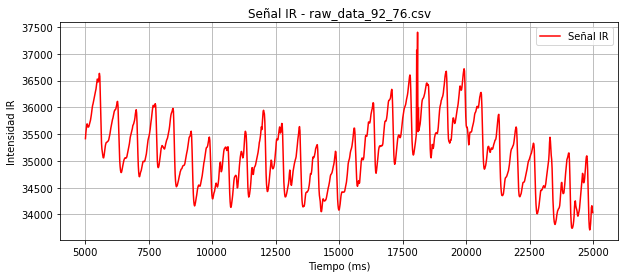

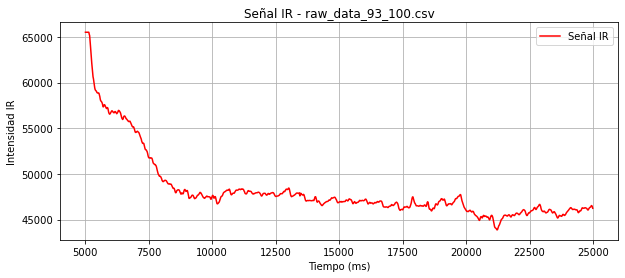

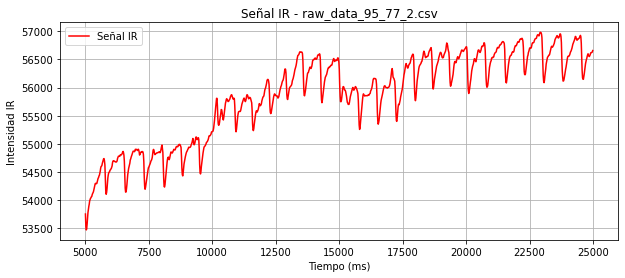

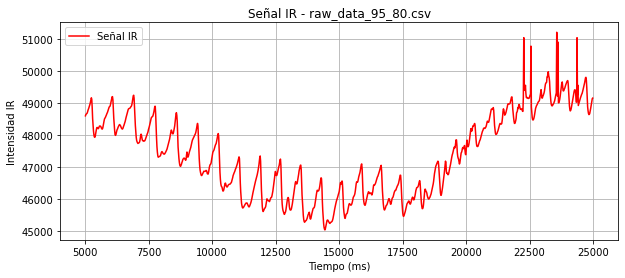

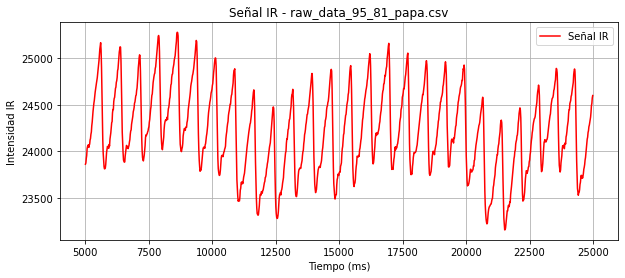

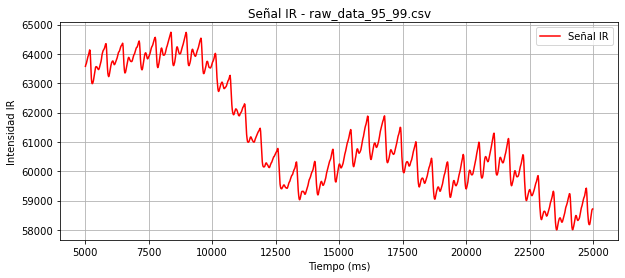

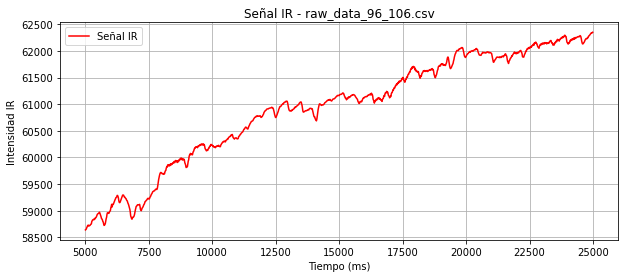

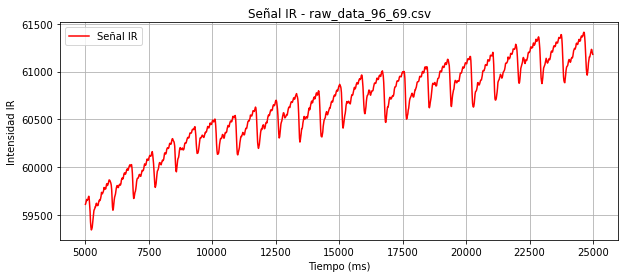

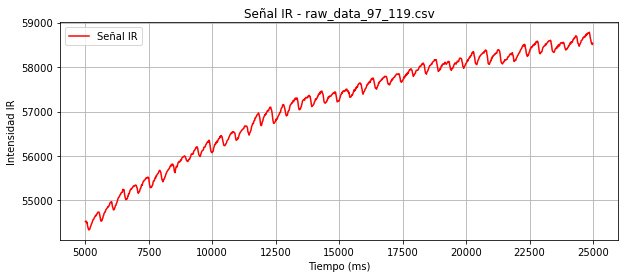

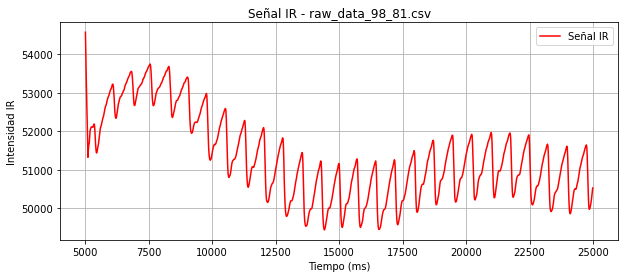

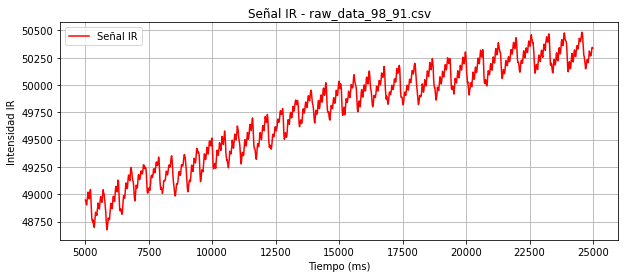

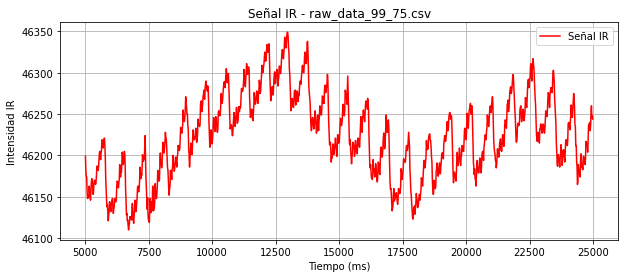

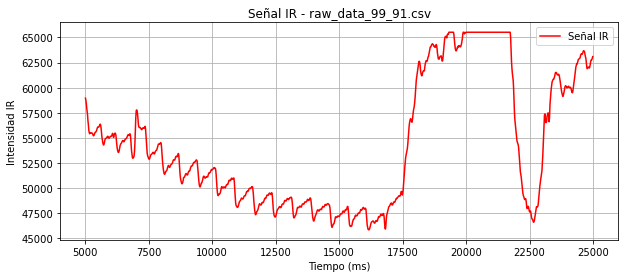

In [9]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Ruta donde están los CSV
ruta_csv = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Buscar todos los archivos CSV en la carpeta
archivos = glob.glob(os.path.join(ruta_csv, "*.csv"))

# Iterar sobre cada archivo y graficar la señal IR
for archivo in archivos:
    # Cargar datos
    df = pd.read_csv(archivo, delimiter=";")

    # Verificar que la columna "IR" existe
    if "IR" not in df.columns:
        print(f"Advertencia: No se encontró la columna 'IR' en {archivo}")
        continue

    # Graficar la señal IR
    plt.figure(figsize=(10, 4))
    plt.plot(df["Tiempo (ms)"], df["IR"], label="Señal IR", color="red")
    plt.xlabel("Tiempo (ms)")
    plt.ylabel("Intensidad IR")
    plt.title(f"Señal IR - {os.path.basename(archivo)}")
    plt.legend()
    plt.grid()
    plt.show()


# Método de Cruce por Umbral

- Filtrar la señal para eliminar ruido.
- Calcular un umbral dinámico basado en la mediana o el valor medio de la señal.
- Detectar los picos que superan ese umbral y calcular el tiempo entre ellos.
- Obtener la frecuencia cardíaca en latidos por minuto (BPM).

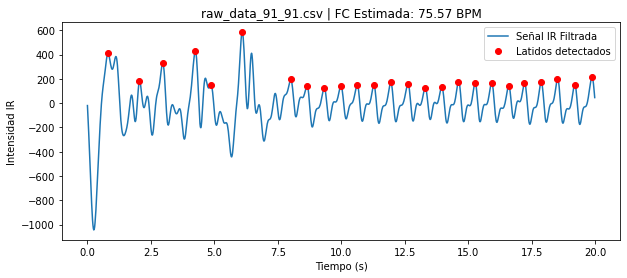

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_91_91.csv | Frecuencia Cardíaca Estimada: 75.57 BPM


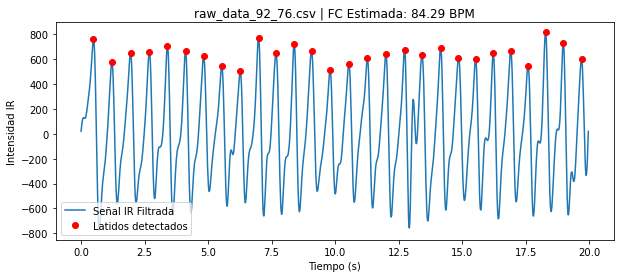

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_92_76.csv | Frecuencia Cardíaca Estimada: 84.29 BPM


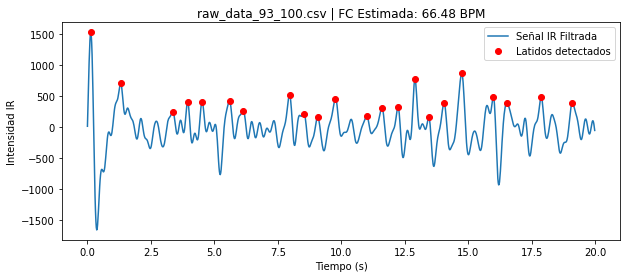

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_93_100.csv | Frecuencia Cardíaca Estimada: 66.48 BPM


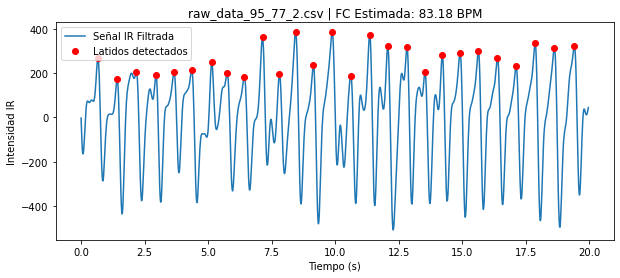

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_77_2.csv | Frecuencia Cardíaca Estimada: 83.18 BPM


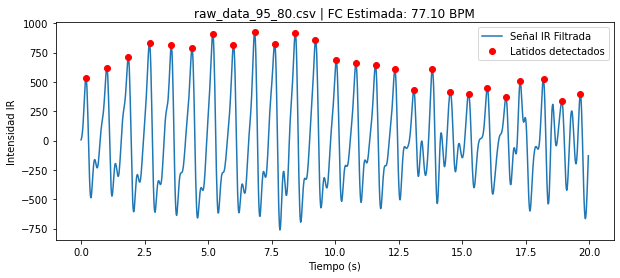

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_80.csv | Frecuencia Cardíaca Estimada: 77.10 BPM


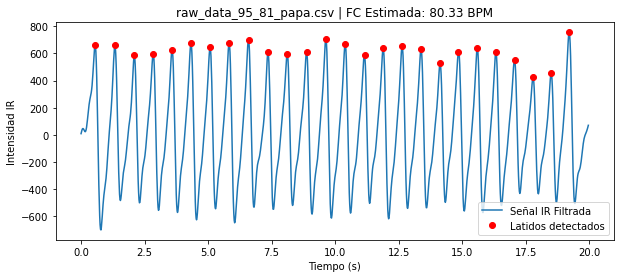

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_81_papa.csv | Frecuencia Cardíaca Estimada: 80.33 BPM


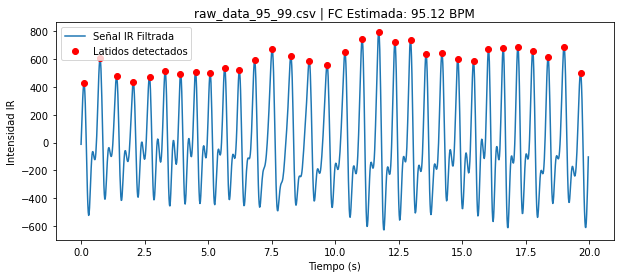

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_95_99.csv | Frecuencia Cardíaca Estimada: 95.12 BPM


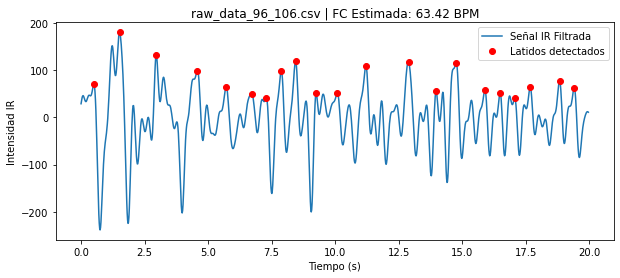

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_96_106.csv | Frecuencia Cardíaca Estimada: 63.42 BPM


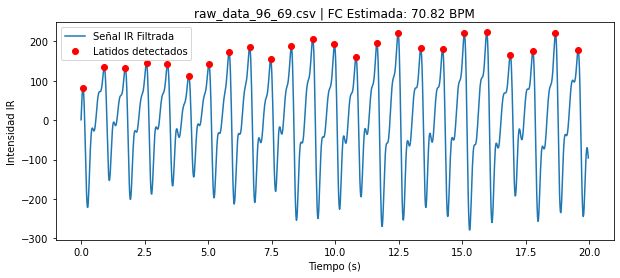

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_96_69.csv | Frecuencia Cardíaca Estimada: 70.82 BPM


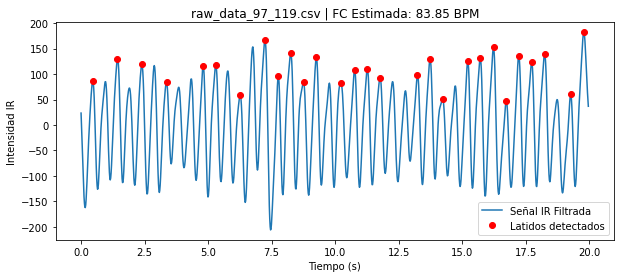

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_97_119.csv | Frecuencia Cardíaca Estimada: 83.85 BPM


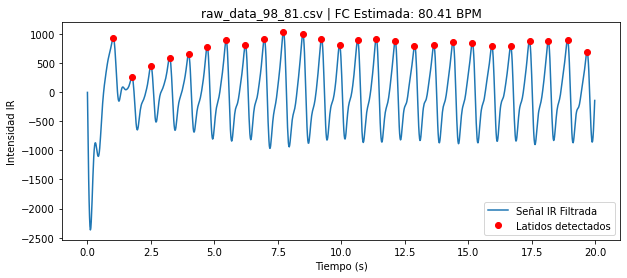

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_98_81.csv | Frecuencia Cardíaca Estimada: 80.41 BPM


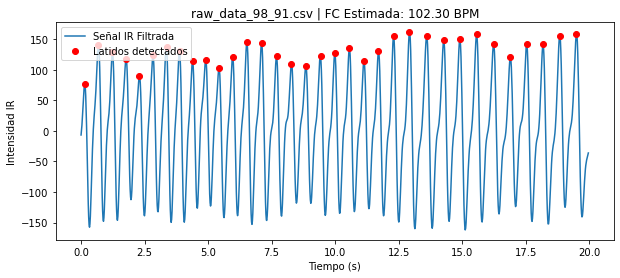

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_98_91.csv | Frecuencia Cardíaca Estimada: 102.30 BPM


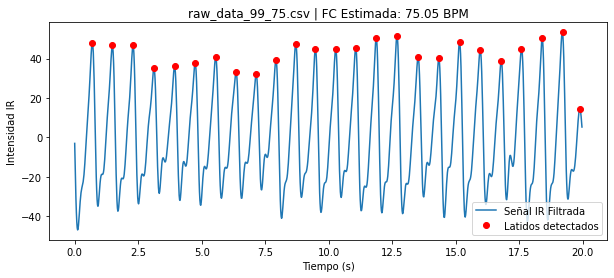

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_99_75.csv | Frecuencia Cardíaca Estimada: 75.05 BPM


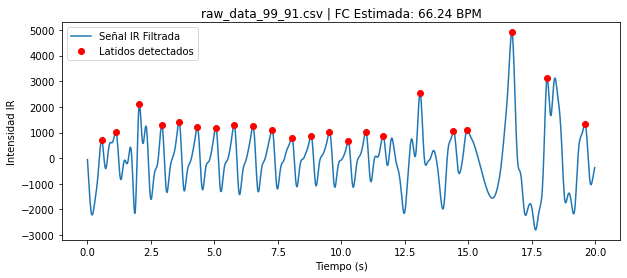

 Archivo: C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados\raw_data_99_91.csv | Frecuencia Cardíaca Estimada: 66.24 BPM


In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt

# Ruta de los archivos procesados
ruta_procesados = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Parámetros de filtrado (pasa banda entre 0.5 Hz y 4 Hz para 30-240 BPM)
def butter_bandpass(lowcut=0.5, highcut=4.0, fs=60, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype="band")
    return b, a

# Función para calcular la frecuencia cardíaca
def calcular_frecuencia_cardiaca(archivo):
    # Cargar el CSV
    df = pd.read_csv(archivo, delimiter=";")

    # Verificar que contiene la columna "IR"
    if "IR" not in df.columns:
        print(f"Error: {archivo} no contiene la columna 'IR'. Se omite.")
        return None

    # Normalizar tiempo en segundos
    df["Tiempo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

    # Extraer la señal IR
    tiempo = df["Tiempo (s)"].values
    señal_ir = df["IR"].values

    # Aplicar filtro pasa banda
    b, a = butter_bandpass()
    señal_filtrada = filtfilt(b, a, señal_ir)

    # Detectar picos usando un umbral dinámico
    umbral = np.median(señal_filtrada) + 0.5 * np.std(señal_filtrada)
    picos, _ = find_peaks(señal_filtrada, height=umbral, distance=30)  # Ajustar 'distance' según la señal

    # Calcular RR-intervals (tiempo entre latidos)
    rr_intervals = np.diff(tiempo[picos])  # Diferencias entre picos en segundos

    if len(rr_intervals) < 2:
        print(f" Advertencia: Pocos latidos detectados en {archivo}. Puede no ser fiable.")
        return None

    # Calcular la frecuencia cardíaca en BPM
    frecuencia_cardiaca = 60 / np.mean(rr_intervals)

    # Graficar señal y detección de picos
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, señal_filtrada, label="Señal IR Filtrada")
    plt.plot(tiempo[picos], señal_filtrada[picos], "ro", label="Latidos detectados")
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Intensidad IR")
    plt.title(f"{os.path.basename(archivo)} | FC Estimada: {frecuencia_cardiaca:.2f} BPM")
    plt.legend()
    plt.show()

    print(f" Archivo: {archivo} | Frecuencia Cardíaca Estimada: {frecuencia_cardiaca:.2f} BPM")

    return frecuencia_cardiaca

# Procesar todos los archivos en la carpeta de procesados
archivos_csv = glob.glob(os.path.join(ruta_procesados, "*.csv"))

for archivo in archivos_csv:
    calcular_frecuencia_cardiaca(archivo)


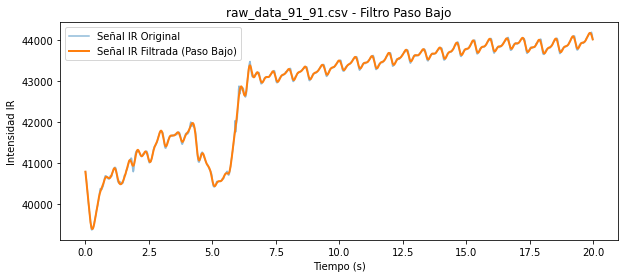

In [12]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ruta de los archivos procesados
ruta_procesados = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Parámetros de filtrado (pasa bajo con frecuencia de corte 4 Hz)
def butter_lowpass(cutoff=4.0, fs=60, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return b, a

# Función para aplicar el filtro de paso bajo
def aplicar_filtro_paso_bajo(archivo):
    # Cargar el CSV
    df = pd.read_csv(archivo, delimiter=";")

    # Verificar que contiene la columna "IR"
    if "IR" not in df.columns:
        print(f"Error: {archivo} no contiene la columna 'IR'. Se omite.")
        return None

    # Normalizar tiempo en segundos
    df["Tiempo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

    # Extraer la señal IR
    tiempo = df["Tiempo (s)"].values
    señal_ir = df["IR"].values

    # Aplicar filtro de paso bajo
    b, a = butter_lowpass()
    señal_filtrada = filtfilt(b, a, señal_ir)

    # Graficar la señal original y filtrada
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, señal_ir, label="Señal IR Original", alpha=0.5)
    plt.plot(tiempo, señal_filtrada, label="Señal IR Filtrada (Paso Bajo)", linewidth=2)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Intensidad IR")
    plt.title(f"{os.path.basename(archivo)} - Filtro Paso Bajo")
    plt.legend()
    plt.show()

    return señal_filtrada, tiempo

# Procesar un solo archivo para prueba
archivo_prueba = glob.glob(os.path.join(ruta_procesados, "*.csv"))[0]  # Primer archivo de la carpeta
señal_filtrada, tiempo = aplicar_filtro_paso_bajo(archivo_prueba)


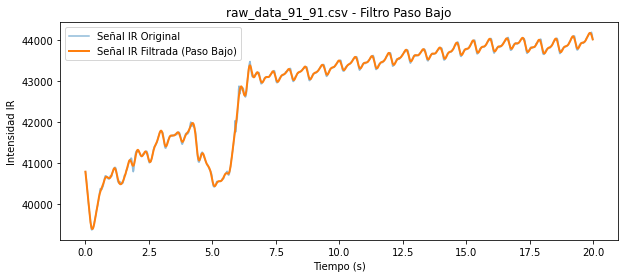

✅ Frecuencia Cardíaca Estimada: 0.00 BPM


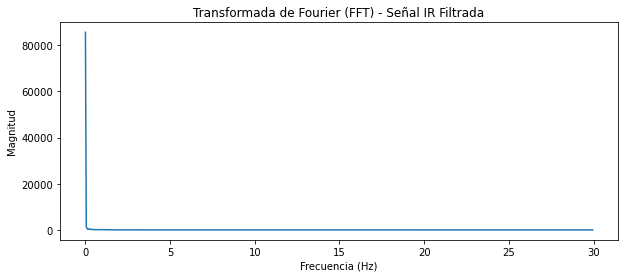

In [13]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

# Ruta de los archivos procesados
ruta_procesados = r"C:\Users\Elena\Desktop\GitHub\TFG-Elena-Ruiz\Datos\Procesados"

# Parámetros de filtrado (pasa bajo con frecuencia de corte 4 Hz)
def butter_lowpass(cutoff=4.0, fs=60, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return b, a

# Función para aplicar el filtro de paso bajo
def aplicar_filtro_paso_bajo(archivo):
    # Cargar el CSV
    df = pd.read_csv(archivo, delimiter=";")

    # Verificar que contiene la columna "IR"
    if "IR" not in df.columns:
        print(f"Error: {archivo} no contiene la columna 'IR'. Se omite.")
        return None

    # Normalizar tiempo en segundos
    df["Tiempo (s)"] = (df["Tiempo (ms)"] - df["Tiempo (ms)"].iloc[0]) / 1000

    # Extraer la señal IR
    tiempo = df["Tiempo (s)"].values
    señal_ir = df["IR"].values

    # Aplicar filtro de paso bajo
    b, a = butter_lowpass()
    señal_filtrada = filtfilt(b, a, señal_ir)

    # Graficar la señal original y filtrada
    plt.figure(figsize=(10, 4))
    plt.plot(tiempo, señal_ir, label="Señal IR Original", alpha=0.5)
    plt.plot(tiempo, señal_filtrada, label="Señal IR Filtrada (Paso Bajo)", linewidth=2)
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Intensidad IR")
    plt.title(f"{os.path.basename(archivo)} - Filtro Paso Bajo")
    plt.legend()
    plt.show()

    return señal_filtrada, tiempo

# Función para calcular la frecuencia cardíaca usando FFT
def calcular_frecuencia_cardíaca_fft(señal_filtrada, fs=60):
    # Realizar la FFT
    N = len(señal_filtrada)
    T = 1.0 / fs
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(señal_filtrada)
    xf = fftfreq(N, T)[:N//2]
    
    # Magnitud de la FFT
    magnitud = 2.0/N * np.abs(yf[:N//2])

    # Buscar la frecuencia dominante
    idx_max = np.argmax(magnitud)
    frecuencia_dominante = xf[idx_max]

    # Estimar la frecuencia cardíaca (en BPM)
    frecuencia_cardíaca_bpm = frecuencia_dominante * 60
    print(f"✅ Frecuencia Cardíaca Estimada: {frecuencia_cardíaca_bpm:.2f} BPM")

    # Graficar la FFT
    plt.figure(figsize=(10, 4))
    plt.plot(xf, magnitud)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.title("Transformada de Fourier (FFT) - Señal IR Filtrada")
    plt.show()

    return frecuencia_cardíaca_bpm

# Procesar un solo archivo para prueba
archivo_prueba = glob.glob(os.path.join(ruta_procesados, "*.csv"))[0]  # Primer archivo de la carpeta
señal_filtrada, tiempo = aplicar_filtro_paso_bajo(archivo_prueba)

# Calcular la frecuencia cardíaca utilizando la FFT
if señal_filtrada is not None:
    calcular_frecuencia_cardíaca_fft(señal_filtrada)
